# Modularisation

Here are some parameters for a problem:

The coordinates:

In [1]:
import numpy as np
x = np.array([13, 16, 22,  1,  4, 28,  4,  8, 10, 20, 22, 19,  5, 24,  7, 25, 25, 13, 27,  2,  7,  8, 24, 15, 25])
y = np.array([18,  6, 26, 14,  9, 10, 21, 20, 17, 20,  6, 16, 16,  1, 19,  4, 25, 18, 20, 20, 20, 15,  8,  1,  2])

A plot of the stops:

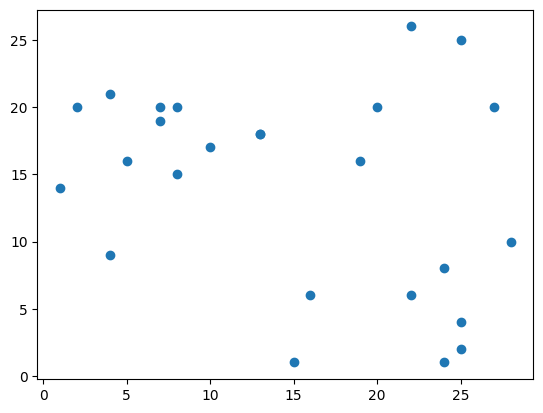

In [2]:
import matplotlib.pyplot as plt
plt.scatter(x, y);

In [6]:
import sklearn.metrics.pairwise
distance_matrix = sklearn.metrics.pairwise.euclidean_distances(tuple(zip(x, y)))
distance_matrix

array([[ 0.        , 12.36931688, 12.04159458, 12.64911064, 12.72792206,
        17.        ,  9.48683298,  5.38516481,  3.16227766,  7.28010989,
        15.        ,  6.32455532,  8.24621125, 20.24845673,  6.08276253,
        18.43908891, 13.89244399,  0.        , 14.14213562, 11.18033989,
         6.32455532,  5.83095189, 14.86606875, 17.11724277, 20.        ],
       [12.36931688,  0.        , 20.88061302, 17.        , 12.36931688,
        12.64911064, 19.20937271, 16.1245155 , 12.52996409, 14.56021978,
         6.        , 10.44030651, 14.86606875,  9.43398113, 15.8113883 ,
         9.21954446, 21.02379604, 12.36931688, 17.80449381, 19.79898987,
        16.64331698, 12.04159458,  8.24621125,  5.09901951,  9.8488578 ],
       [12.04159458, 20.88061302,  0.        , 24.18677324, 24.75883681,
        17.08800749, 18.68154169, 15.23154621, 15.        ,  6.32455532,
        20.        , 10.44030651, 19.72308292, 25.07987241, 16.55294536,
        22.20360331,  3.16227766, 12.04159458,  7

## What does this do:

In [7]:
def run_2_opt_algorithm(
    number_of_stops,
    distance_matrix,
    iterations,
    seed=None,
):

    internal_stops = list(range(1, number_of_stops))
    if seed is not None:
        np.random.seed(seed)
        np.random.shuffle(internal_stops)
    tour = [0] + internal_stops + [0]
    best_cost = sum(
        distance_matrix[current_stop, next_stop]
        for current_stop, next_stop in
        zip(tour[:-1], tour[1:])
        )
    for _ in range(iterations):

        two_indices = np.random.choice(range(1, number_of_stops), 2)
        i, j = sorted(two_indices)

        candidate_tour = tour[:i] + tour[i:j + 1][::-1] + tour[j + 1:]

        candidate_cost = sum(
            distance_matrix[current_stop, next_stop]
            for current_stop, next_stop in
            zip(candidate_tour[:-1], candidate_tour[1:])
            )

        if (candidate_cost) <= best_cost:
            best_cost = candidate_cost
            tour = candidate_tour

    return tour

In [8]:
tour = run_2_opt_algorithm(number_of_stops=25, distance_matrix=distance_matrix, iterations=500, seed=0)

In [9]:
tour

[0,
 17,
 14,
 20,
 7,
 8,
 21,
 12,
 6,
 19,
 3,
 4,
 11,
 23,
 1,
 10,
 13,
 15,
 24,
 22,
 5,
 18,
 16,
 2,
 9,
 0]

In [10]:
def plot_tour(x, y, tour):
    """
    This plots a given tour on a set of points.
    """
    ordered_x = x[tour]
    ordered_y = y[tour]
    plt.figure()
    plt.scatter(x, y)
    plt.plot(ordered_x, ordered_y)

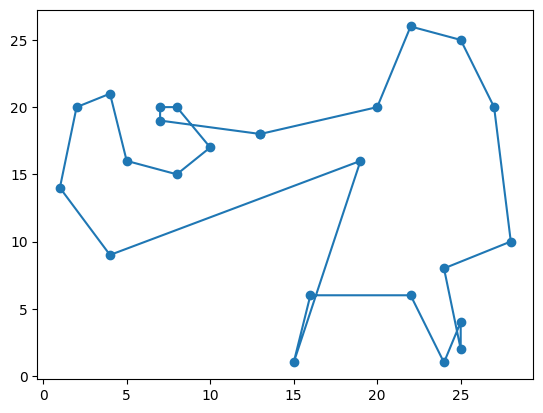

In [11]:
plot_tour(x=x, y=y, tour=tour)

In [12]:
def get_tour(number_of_stops, seed=None):
    """
    This returns a random tour on a number of stops.

    If no seed is given then it just returns the stops in the given order.
    """
    internal_stops = list(range(1, number_of_stops))
    if seed is not None:
        np.random.seed(seed)
        np.random.shuffle(internal_stops)
    return [0] + internal_stops + [0]

In [14]:
get_tour(number_of_stops=4)

[0, 1, 2, 3, 0]

In [20]:
def swap_cities(tour, steps):
    """
    Given the index of two steps this swaps them in the tour.

    This is done by ....
    """
    i, j = sorted(steps)
    new_tour = tour[:i] + tour[i: j + 1][::-1] + tour[j + 1: ]
    return new_tour

In [21]:
tour = get_tour(number_of_stops=10, seed=0)

In [22]:
tour

[0, 8, 3, 2, 5, 9, 7, 4, 1, 6, 0]

In [23]:
swap_cities(tour=tour, steps=[4, 7])

[0, 8, 3, 2, 4, 7, 9, 5, 1, 6, 0]

In [24]:
def get_cost(tour, distance_matrix):
    """
    Return the total distance travelled in a given tour.

    This is done by summing all pairs of consecutive stops.
    """
    return sum(
        distance_matrix[current_stop, next_stop]
        for current_stop, next_stop in zip(tour[:-1], tour[1:])
    )

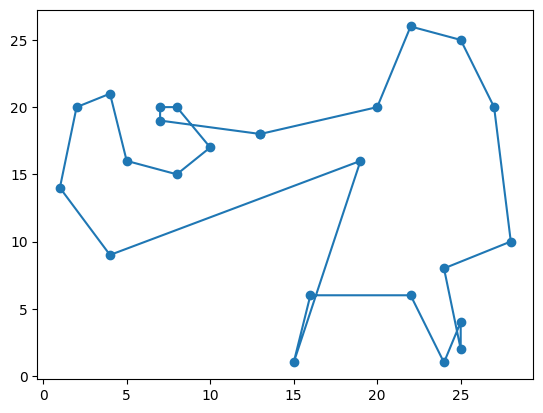

In [27]:
tour = run_2_opt_algorithm(number_of_stops=25, distance_matrix=distance_matrix, iterations=500, seed=0)
plot_tour(x=x, y=y, tour=tour)

In [28]:
get_cost(tour=tour, distance_matrix=distance_matrix)

np.float64(133.40828432465426)

Let us modularise the `run_2_opt_algorithm` function:

In [29]:
def run_2_opt_algorithm(
    number_of_stops,
    distance_matrix,
    iterations,
    seed=None,
):
    """
    This runs the 2 opt algorithm

    <Describe the actual algorithm>

    This essentially does 3 things:
        1. Starts with a random tour;
        2. Makes a small change to it (by swapping two stops);
        3. Keep the new tour if it is better (in terms of total traveled distance)

    For example...
    """
    tour = get_tour(number_of_stops=number_of_stops, seed=seed)
    best_cost = get_cost(tour=tour, distance_matrix=distance_matrix)
    for _ in range(iterations):
        two_indices = np.random.choice(range(1, number_of_stops), 2)
        candidate_tour = swap_cities(tour=tour, steps=two_indices)
        candidate_cost = get_cost(tour=candidate_tour, distance_matrix=distance_matrix)
        if candidate_cost < best_cost:
            best_cost = candidate_cost
            tour = candidate_tour
    return tour

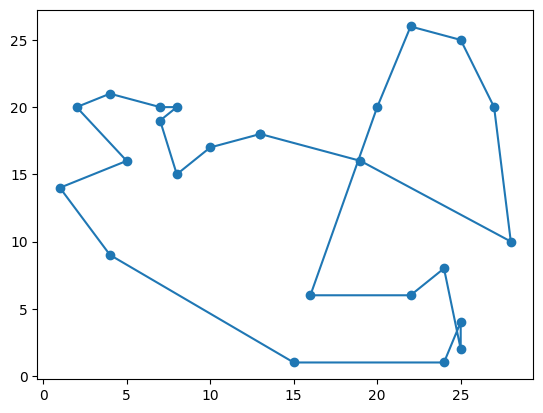

In [30]:
tour = run_2_opt_algorithm(number_of_stops=25, distance_matrix=distance_matrix, iterations=500, seed=0)
plot_tour(x=x, y=y, tour=tour)

In [31]:
x

array([13, 16, 22,  1,  4, 28,  4,  8, 10, 20, 22, 19,  5, 24,  7, 25, 25,
       13, 27,  2,  7,  8, 24, 15, 25])

In [32]:
y

array([18,  6, 26, 14,  9, 10, 21, 20, 17, 20,  6, 16, 16,  1, 19,  4, 25,
       18, 20, 20, 20, 15,  8,  1,  2])

In [33]:
[x, y]

[array([13, 16, 22,  1,  4, 28,  4,  8, 10, 20, 22, 19,  5, 24,  7, 25, 25,
        13, 27,  2,  7,  8, 24, 15, 25]),
 array([18,  6, 26, 14,  9, 10, 21, 20, 17, 20,  6, 16, 16,  1, 19,  4, 25,
        18, 20, 20, 20, 15,  8,  1,  2])]